In [3]:
using Distributions, Plots, StatsPlots, Random, StatsBase
theme(:ggplot2)

Let $X$ by the predator population and $Y$ by the prey population. Then the following four events may happen in time:

1. A predator may be born with rate $\theta_1 XY$, increasing $X$ by $1$.
2. A predator may die with rate $\theta_2 X$, decreasing $X$ by $1$.
3. A prey may be born with rate $\theta_3 Y$, increasing $Y$ by $1$.
4. A prey may die with rate $\theta_4 XY$, decreasing $Y$ by $1$.

One way of simulating the evolutions of the predator and prey populations is through the Gillespie's algorithm. The algorithm procees as follows

1. The time to the next event is generated from an Exponential distribution with rate $\theta_1XY+\theta_2X+\theta_3Y+\theta_4XY$
2. Select one event from (1)-(4) and perform the event
3. GOTO Step 1

In [10]:
function SimLVModel(θ,TerminalTime;x0=50,y0=100,dt=1.0)
    xvec = [x0]
    yvec = [y0]
    timevec = [0.0]
    nlat = 0 
    while true
        # Obtain the rate at which the next event occurs
        rate_vec = [θ[1]*xvec[end]*yvec[end], θ[2]*xvec[end], θ[3]*yvec[end], θ[4]*xvec[end]*yvec[end]]
        # Simulate waiting time to the next event
        waiting_time = rand(Exponential(1/sum(rate_vec)))
        nlat += 1
        push!(timevec,timevec[end]+waiting_time) # Get the next event time
        if timevec[end] > TerminalTime # If the next event time exceeds the Terminal Time, STOP. 
            break
        end
        event_index = findfirst(rand() .<= cumsum(rate_vec)/sum(rate_vec))
        #event_index = sample(1:4,Weights(rate_vec)) # Sample and simulate the next event
        nlat += 1
        if event_index == 1
            push!(xvec,xvec[end]+1)
            push!(yvec,yvec[end])
        elseif event_index == 2
            push!(xvec,xvec[end]-1)
            push!(yvec,yvec[end])
        elseif event_index == 3
            push!(xvec,xvec[end])
            push!(yvec,yvec[end]+1)
        else
            push!(xvec,xvec[end])
            push!(yvec,yvec[end]-1)
        end
    end
    obstime = collect(dt:dt:TerminalTime)
    obsx = zeros(length(obstime))
    obsy = zeros(length(obstime))
    for i = 1:length(obstime)
        ind = findlast(timevec .< obstime[i])
        obsx[i] = xvec[ind]
        obsy[i] = yvec[ind]
    end
    return (x=xvec[2:end],y=yvec[2:end],t=timevec[2:end-1],obsx=obsx,obsy=obsy,obstime=obstime,nlat=nlat)
end



SimLVModel (generic function with 1 method)

In [17]:
data.t

6442-element Vector{Float64}:
  0.0004559193129564619
  0.002207211171142644
  0.011104088094808782
  0.012481904737470807
  0.014535385466062208
  0.021466774168204156
  0.02777835509483715
  0.035561265866564905
  0.03710309136473723
  0.04396376760437757
  0.0516091317929122
  0.05526278106334003
  0.06439619006216281
  ⋮
 33.239846647061334
 33.28576943443454
 33.38707419393712
 33.749458931781774
 33.941870055444824
 34.11258938124529
 34.3369892077967
 34.35765868028945
 34.64536193381133
 35.374170948675335
 36.59226023733445
 37.514802950934474

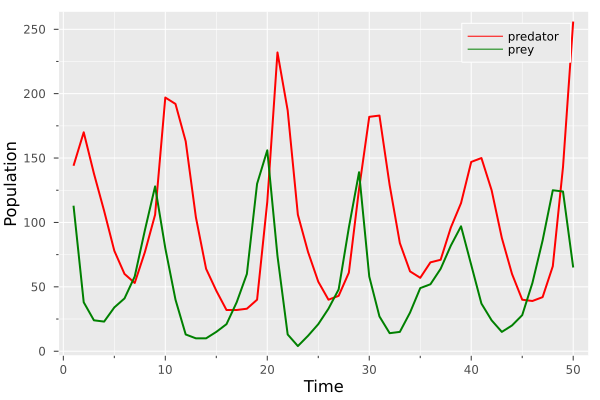

In [23]:
Random.seed!(220)
θ = [0.01,0.5,1.0,0.01]
data = SimLVModel(θ,50,x0=50,y0=100)
plot(data.obstime,data.obsx,label="predator",xlabel="Time",ylabel="Population",color=:red,linewidth=2.0)
plot!(data.obstime,data.obsy,label="prey",color=:green,linewidth=2.0)

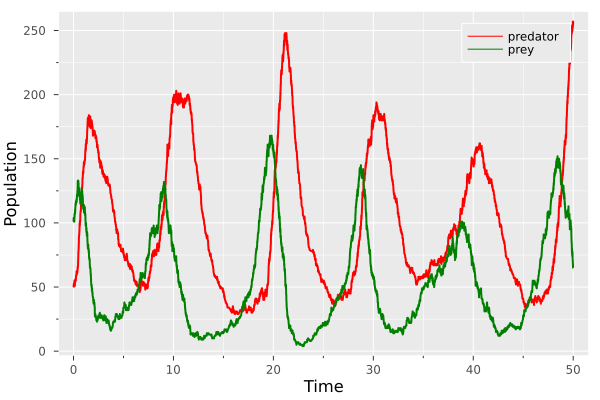

In [24]:
plot(data.t,data.x,label="predator",xlabel="Time",ylabel="Population",color=:red,linewidth=2.0,xlim=(0,50))
plot!(data.t,data.y,label="prey",color=:green,linewidth=2.0)

In the simulator, latent variables were used to generate the random waiting times and the corresponding events to be simulated. Since there is a fixed terminal time, the number of events occurred within the time interval is therefore random. We try to investigate the distribution of the number of latents used in the model by using an Monte Carlo estimation. 

In [31]:
nsamp = 1000
NlatVec = zeros(nsamp)
Threads.@threads for n = 1:nsamp
    data = SimLVModel(θ,50,x0=50,y0=100)
    NlatVec[n] = data.nlat
    println(n)
end
#histogram(NlatVec)

1
144
859
573
2
145
860
3
574
146
147
575
148
861
4
149
862
576
5
150
863
577
6
864
7
151
865
578
866
579
152
8
867
580
9
153
581
868
582
10
154
11
869
583
155
12
584
13
870
156
585
14
157
871
15
872
586
16
873
587
17
588
18
589
874
19
875
590
20
591
21
876
592
22
593
877
23
594
24
595
878
25
596
879
597
880
598
599
881
882
600
883
601
884
602
885
603
604
886
605
887
606
888
607
889
890
608
891
609
610
892
611
612
893
613
894
614
895
615
896
616
897
617
898
618
899
900
619
620
901
621
902
622
623
903
624
904
905
625
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941


LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1mArray[22m
    [90m   @ [39m[90m./[39m[90m[4mboot.jl:457[24m[39m[90m [inlined][39m
     [2] [0m[1msimilar[22m
    [90m   @ [39m[90m./[39m[90m[4marray.jl:375[24m[39m[90m [inlined][39m
     [3] [0m[1m#cumsum#784[22m
    [90m   @ [39m[90m./[39m[90m[4maccumulate.jl:112[24m[39m[90m [inlined][39m
     [4] [0m[1mcumsum[22m
    [90m   @ [39m[90m./[39m[90m[4maccumulate.jl:150[24m[39m[90m [inlined][39m
     [5] [0m[1mSimLVModel[22m[0m[1m([22m[90mθ[39m::[0mVector[90m{Float64}[39m, [90mTerminalTime[39m::[0mInt64; [90mx0[39m::[0mInt64, [90my0[39m::[0mInt64, [90mdt[39m::[0mFloat64[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m./[39m[90m[4mIn[10]:16[24m[39m
     [6] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m./[39m[90m[4mIn[31]:4[24m[39m[90m [inlined][39m
     [7] [0m[1m(::var"#72#threadsfor_fun#5"{UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [8] [0m[1m(::var"#72#threadsfor_fun#5"{UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [28]:
@time SimLVModel(θ,50,x0=50,y0=100)

  0.000774 seconds (18.88 k allocations: 1.847 MiB)


(x = [49, 49, 49, 49, 49, 49, 50, 50, 51, 52  …  9, 8, 7, 6, 5, 4, 3, 2, 1, 0], y = [100, 99, 100, 101, 102, 103, 103, 104, 104, 104  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], t = [0.0060862083725122884, 0.009702530247446519, 0.01850228358086064, 0.020983674525371865, 0.02394755599897732, 0.02660660525987147, 0.027020785440920438, 0.02905918529127021, 0.03241832540300095, 0.04992440078829943  …  20.321568683289218, 20.49627976821505, 20.571046069899012, 20.574570239764167, 20.666416635133036, 20.984511791095557, 21.610930202697816, 21.70766312385646, 22.238348481164007, 22.704218014079945], obsx = [128.0, 244.0, 185.0, 115.0, 71.0, 48.0, 33.0, 23.0, 25.0, 31.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], obsy = [146.0, 61.0, 13.0, 5.0, 7.0, 8.0, 9.0, 17.0, 39.0, 81.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], obstime = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0], nlat = 7481)